#Gather and Clean the Data

In [ ]:
#installing all the libraries since I code on Colab, ignore this part if you are doing it on jupyterlab/VSCode
!pip install alpaca-trade-api
!pip install pandas
!pip install pandas_ta
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.8/123.8 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 757.7/757.7 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/107.4 kB ? eta -:--:--

In [2]:
#importing the libraries installed
import alpaca_trade_api as tradeapi
import pandas as pd
import pandas_ta as ta
import mplfinance as mpf

In [3]:
#Loading Alpaca API keys
API_Key = "PKRFUQSXUDG18L40J1VG" #Nathan's Key
API_secret_key = "2XAyzllnBZhxY8BSv8o1xkfzw3pHgIIbQsGwr7jp" #Nathan's secret Key
API_base_url = "https://paper-api.alpaca.markets" #(for live account trading, just remove the 'paper' from this link and it would work the same)

In [4]:
#initializing Alpaca API on our collab environment
api = tradeapi.REST(API_Key, API_secret_key, API_base_url, api_version='v2')

In [5]:
#function to fetch historical data with a date range from January 1st 2021 to February 1st 2025

def fetch_data(symbol, start, end, timeframe='1D'):
  start = '2021-01-01'
  end = '2025-02-01'
  barset = api.get_bars(symbol, timeframe, start=start, end=end, feed = 'iex')
  bars = list(barset)
  return bars

In [6]:
#Get Vanguard Info
bars = fetch_data('VOO', '2025-01-01', '2025-02-01')
print(bars)

[Bar({   'c': 338.97,
    'h': 344.99,
    'l': 335.6,
    'n': 504,
    'o': 344.99,
    't': '2021-01-04T05:00:00Z',
    'v': 35054,
    'vw': 339.445676}), Bar({   'c': 341.16,
    'h': 342.23,
    'l': 338.39,
    'n': 141,
    'o': 338.39,
    't': '2021-01-05T05:00:00Z',
    'v': 8638,
    'vw': 340.591106}), Bar({   'c': 343.4,
    'h': 346.41,
    'l': 339.34,
    'n': 289,
    'o': 339.68,
    't': '2021-01-06T05:00:00Z',
    'v': 31534,
    'vw': 343.590083}), Bar({   'c': 348.5,
    'h': 349.13,
    'l': 345.61,
    'n': 221,
    'o': 345.69,
    't': '2021-01-07T05:00:00Z',
    'v': 17123,
    'vw': 348.165702}), Bar({   'c': 350.53,
    'h': 350.58,
    'l': 346.81,
    'n': 192,
    'o': 349.935,
    't': '2021-01-08T05:00:00Z',
    'v': 20841,
    'vw': 349.354911}), Bar({   'c': 348.05,
    'h': 349.27,
    'l': 347.32,
    'n': 126,
    'o': 347.49,
    't': '2021-01-11T05:00:00Z',
    'v': 15578,
    'vw': 348.014023}), Bar({   'c': 348.69,
    'h': 348.95,
    'l': 3

In [7]:
data = {
    'Date': [bar.t for bar in bars],
    'Open': [bar.o for bar in bars],
    'High': [bar.h for bar in bars],
    'Low': [bar.l for bar in bars],
    'Close': [bar.c for bar in bars],
    'Volume': [bar.v for bar in bars]
}

In [8]:
#creating dataframe and setting index
df = pd.DataFrame(data)
df.set_index('Date', inplace=True)
df

,Open,High,Low,Close,Volume
Date,,,,,
2021-01-04 00:00:00-05:00,344.990,344.990,335.600,338.97,35054
2021-01-05 00:00:00-05:00,338.390,342.230,338.390,341.16,8638
2021-01-06 00:00:00-05:00,339.680,346.410,339.340,343.40,31534
2021-01-07 00:00:00-05:00,345.690,349.130,345.610,348.50,17123
2021-01-08 00:00:00-05:00,349.935,350.580,346.810,350.53,20841
...,...,...,...,...,...
2025-01-27 00:00:00-05:00,546.930,551.090,546.920,551.09,74620
2025-01-28 00:00:00-05:00,552.305,556.570,549.665,555.89,42878
2025-01-29 00:00:00-05:00,555.120,555.200,551.160,553.14,46218


In [9]:
#export df to csv
df.to_csv('vanguard.csv')

In [10]:
#Get the dtypes
df.dtypes

,0
Open,float64
High,float64
Low,float64
Close,float64
Volume,int64


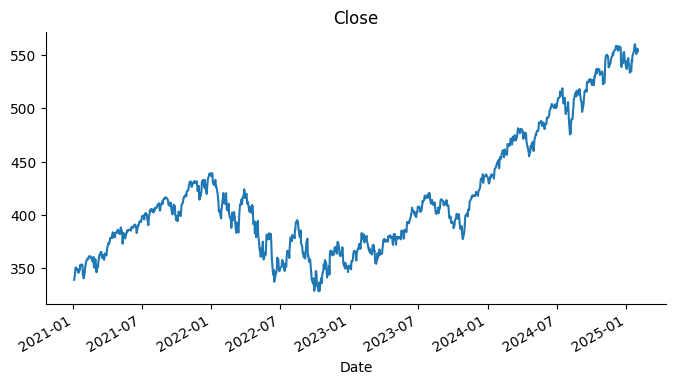

In [11]:
#graph the date and closing numbers

from matplotlib import pyplot as plt
df['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

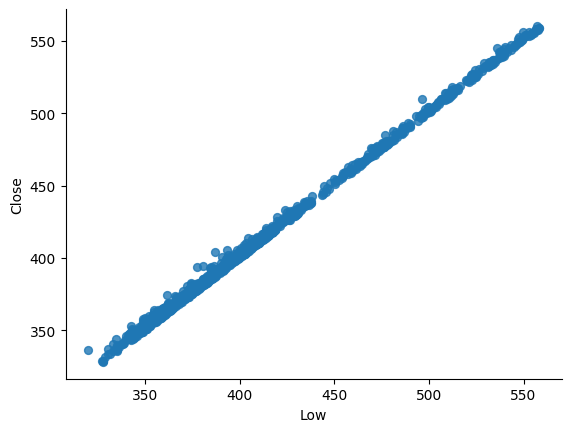

In [12]:
#track the low and closing prices
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Low', y='Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

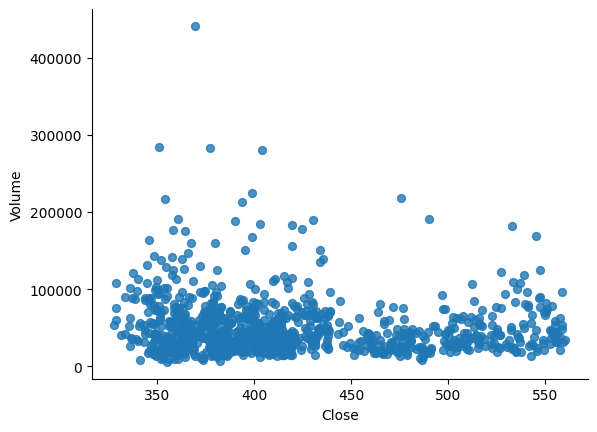

In [13]:
#tracking volume and closing shares
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Close', y='Volume', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

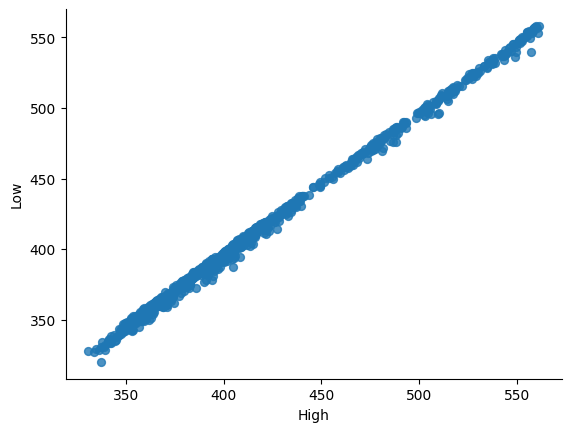

In [14]:
#test graph for fun (low vs. high)
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [17]:
 # Start Spark session
from pyspark.sql import SparkSession
# Read in data.
from pyspark import SparkFiles
spark = SparkSession.builder.appName("VanguardStock").getOrCreate()
spark.sparkContext.addFile('vanguard.csv')


In [18]:
spark_df = spark.read.csv(SparkFiles.get("vanguard.csv"), sep=",", header=True)
spark_df.show()

+--------------------+-------+------+------+------+------+
|                Date|   Open|  High|   Low| Close|Volume|
+--------------------+-------+------+------+------+------+
|2021-01-04 00:00:...| 344.99|344.99| 335.6|338.97| 35054|
|2021-01-05 00:00:...| 338.39|342.23|338.39|341.16|  8638|
|2021-01-06 00:00:...| 339.68|346.41|339.34| 343.4| 31534|
|2021-01-07 00:00:...| 345.69|349.13|345.61| 348.5| 17123|
|2021-01-08 00:00:...|349.935|350.58|346.81|350.53| 20841|
|2021-01-11 00:00:...| 347.49|349.27|347.32|348.05| 15578|
|2021-01-12 00:00:...| 348.48|348.95| 346.4|348.69| 34792|
|2021-01-13 00:00:...| 348.29|350.05|347.49|349.34| 13858|
|2021-01-14 00:00:...| 349.92|350.24|347.59|348.06| 56145|
|2021-01-15 00:00:...| 346.54|346.59|343.53|345.54| 16758|
|2021-01-19 00:00:...| 347.97|348.53| 346.6|348.14| 30896|
|2021-01-20 00:00:...| 350.15|353.55|350.13|353.05| 21441|
|2021-01-21 00:00:...| 353.42| 353.8|352.45| 353.1| 15217|
|2021-01-22 00:00:...| 351.63|352.78|351.15| 352.2|  934

In [20]:
spark_df.createOrReplaceTempView('vanguard')

In [21]:
spark.sql('SELECT * FROM vanguard').show()

+--------------------+-------+------+------+------+------+
|                Date|   Open|  High|   Low| Close|Volume|
+--------------------+-------+------+------+------+------+
|2021-01-04 00:00:...| 344.99|344.99| 335.6|338.97| 35054|
|2021-01-05 00:00:...| 338.39|342.23|338.39|341.16|  8638|
|2021-01-06 00:00:...| 339.68|346.41|339.34| 343.4| 31534|
|2021-01-07 00:00:...| 345.69|349.13|345.61| 348.5| 17123|
|2021-01-08 00:00:...|349.935|350.58|346.81|350.53| 20841|
|2021-01-11 00:00:...| 347.49|349.27|347.32|348.05| 15578|
|2021-01-12 00:00:...| 348.48|348.95| 346.4|348.69| 34792|
|2021-01-13 00:00:...| 348.29|350.05|347.49|349.34| 13858|
|2021-01-14 00:00:...| 349.92|350.24|347.59|348.06| 56145|
|2021-01-15 00:00:...| 346.54|346.59|343.53|345.54| 16758|
|2021-01-19 00:00:...| 347.97|348.53| 346.6|348.14| 30896|
|2021-01-20 00:00:...| 350.15|353.55|350.13|353.05| 21441|
|2021-01-21 00:00:...| 353.42| 353.8|352.45| 353.1| 15217|
|2021-01-22 00:00:...| 351.63|352.78|351.15| 352.2|  934